# USED CAR DATA -EDA PROJECT

This project involves exploratory data analysis (EDA) of a used car sales dataset, which includes various attributes related to car details and sales transactions. The dataset contains the following columns:

ID, DistributorName, Location, CarName, ManufacturerName, CarType, Color, NumberofSeats, Energy, ManufacturedYear, Price, MileageKM, EnginePowerHP, PurchasedDate, CarSaleStatus, SoldDate, PurchasedPrice, SoldPrice, SalesAgentName, SalesRating, Feedback.
The goal is to explore relationships between these variables, identify trends in car pricing, sales performance, and customer satisfaction, and uncover insights that can drive business decisions.

## Data Cleaning

#### Importing Data Set and libraries

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as  np
data=pd.read_csv(r"E:\data_analytics\project\used_car_sales.csv")
print(data.head())

       ID Distributor Name        Location  Car Name Manufacturer Name  \
0  O2KE18          Carmudi      California  Fortuner            Toyota   
1  EPMPC8        Carousell    Philadelphia     Creta           Hyundai   
2  SQKXAP          Carsome  North Carolina   Scorpio          Mahindra   
3  PWP2QK          Trivett  North Carolina     Plato             Prazo   
4  FNDDKM            Zupps        Portland     Dzire            Maruti   

      Car Type Color    Gearbox  Number of Seats  Number of Doors  ...  \
0          SUV  Gray  Automatic                8                5  ...   
1    Hatchback  Blue  Automatic                5                5  ...   
2          SUV  Gray  Automatic                5                5  ...   
3  Convertible  Gray  Automatic                2                2  ...   
4        Sedan   Red  Automatic                5                5  ...   

  Purchased Date  Car Sale Status   Sold Date  Purchased Price-$  \
0     2022-10-26          Un Sold  1970-01

#### Basic Information about Data

In [2]:
#Basic information
data.info()
#Describe data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  10000 non-null  object
 1   Distributor Name    10000 non-null  object
 2   Location            10000 non-null  object
 3   Car Name            10000 non-null  object
 4   Manufacturer Name   10000 non-null  object
 5   Car Type            10000 non-null  object
 6   Color               10000 non-null  object
 7   Gearbox             10000 non-null  object
 8   Number of Seats     10000 non-null  int64 
 9   Number of Doors     10000 non-null  int64 
 10  Energy              10000 non-null  object
 11  Manufactured Year   10000 non-null  int64 
 12  Price-$             10000 non-null  int64 
 13  Mileage-KM          10000 non-null  int64 
 14  Engine Power-HP     10000 non-null  int64 
 15  Purchased Date      10000 non-null  object
 16  Car Sale Status     100

,Number of Seats,Number of Doors,Manufactured Year,Price-$,Mileage-KM,Engine Power-HP,Purchased Price-$,Sold Price-$,Margin-%,Sales Rating,Sales Commission-$
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.786000,4.081000,2019.525200,7975.100000,45497.531800,143.344700,6720.617700,1487.776100,0.428200,3.004500,17.809100
std,1.466499,1.266807,2.886693,1018.829618,26867.899798,44.762333,1110.840531,2900.679397,5.811697,1.408644,57.135284
min,2.000000,2.000000,2015.000000,6000.000000,1000.000000,100.000000,4015.000000,0.000000,-26.000000,1.000000,0.000000
25%,4.000000,3.000000,2017.000000,7200.000000,22530.250000,113.000000,5937.000000,0.000000,0.000000,2.000000,0.000000
50%,5.000000,5.000000,2020.000000,7900.000000,44471.500000,120.000000,6685.000000,0.000000,0.000000,3.000000,0.000000
75%,5.000000,5.000000,2022.000000,8700.000000,66292.500000,175.000000,7481.250000,0.000000,0.000000,4.000000,0.000000
max,8.000000,5.000000,2024.000000,10900.000000,99983.000000,250.000000,10383.000000,11657.000000,33.000000,5.000000,308.000000


#### Removing unwanted columns

In [3]:
data=data.drop(['Margin-%','Sales Commission-$','Gearbox','Number of Doors'],axis=1)

#### Removing space and special characters in column name

In [4]:
data.columns=data.columns.str.replace('-','').str.replace('$','').str.replace('%','').str.replace(' ','')
print(data.columns)

Index(['ID', 'DistributorName', 'Location', 'CarName', 'ManufacturerName',
       'CarType', 'Color', 'NumberofSeats', 'Energy', 'ManufacturedYear',
       'Price', 'MileageKM', 'EnginePowerHP', 'PurchasedDate', 'CarSaleStatus',
       'SoldDate', 'PurchasedPrice', 'SoldPrice', 'SalesAgentName',
       'SalesRating', 'Feedback'],
      dtype='object')


#### Changing Data types

In [5]:
data['PurchasedDate']=pd.to_datetime(data['PurchasedDate'])
data['SoldDate']=pd.to_datetime(data['SoldDate'])

#### Removing Duplicates

In [6]:
data.drop_duplicates(inplace=True)

#### Finding and Removing null values

In [7]:
data.isna().sum()

ID                  0
DistributorName     0
Location            0
CarName             0
ManufacturerName    0
CarType             0
Color               0
NumberofSeats       0
Energy              0
ManufacturedYear    0
Price               0
MileageKM           0
EnginePowerHP       0
PurchasedDate       0
CarSaleStatus       0
SoldDate            0
PurchasedPrice      0
SoldPrice           0
SalesAgentName      0
SalesRating         0
Feedback            0
dtype: int64

#### A Quick Boxplot

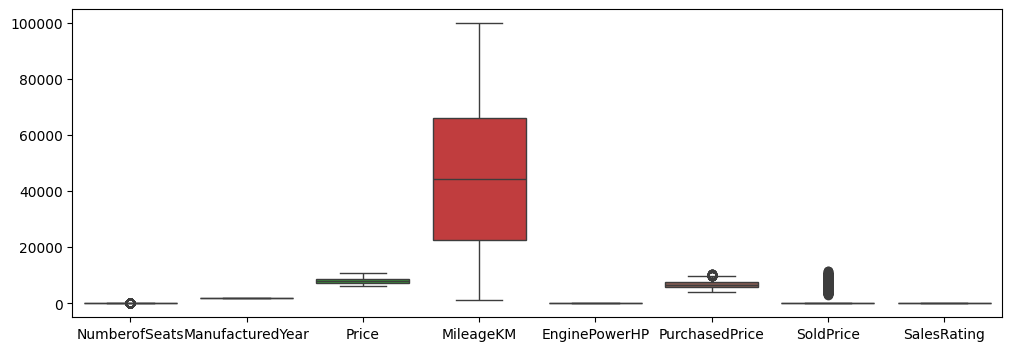

In [8]:
#boxplot to find outliers
plt.figure(figsize=(12,4))
sns.boxplot(data=data)
plt.show()
#no outliers

## DATA ANALYSIS

##### 1. Highest number of sales amoung all group

In [9]:
# 1.highest number of sales amoung all group
sold_cars=data[data['CarSaleStatus']=='Sold']
grouped_df=sold_cars.groupby(['ManufacturerName','DistributorName','CarName']).size().reset_index().max()
print(grouped_df)


ManufacturerName    Toyota
DistributorName      Zupps
CarName                i20
0                       18
dtype: object


##### 2. Mean value of the sold price and the percentage count of cars with sold price less and greater then the mean value.

Mean sold price: 6868.772391505078
car sold price greater then mean: 1063
car sold price less than mean: 8937


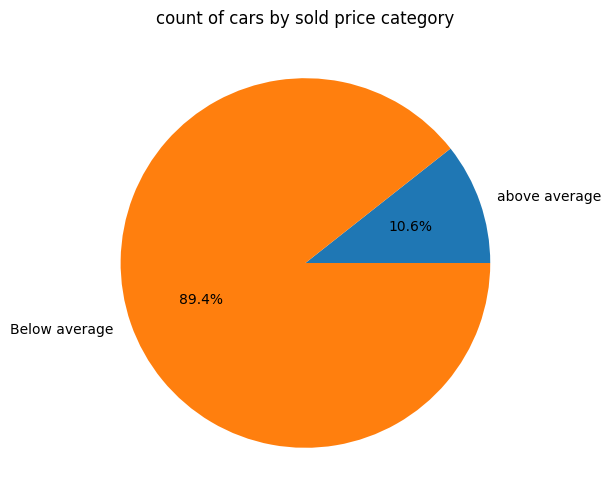

In [10]:
#2.Mean value of the sold price and the percentage count of cars with sold price less and greater then the mean value.
average_sold_price=data['SoldPrice'].replace(0,np.nan).mean()
print("Mean sold price:",average_sold_price)
cars_above_average_sold=data[data['SoldPrice']>average_sold_price]
cars_below_average_sold=data[data['SoldPrice']<=average_sold_price]
count_sold_above_meanvalue=cars_above_average_sold.shape[0]
count_sold_below_meanvalue=cars_below_average_sold.shape[0]
print("car sold price greater then mean:",count_sold_above_meanvalue)
print("car sold price less than mean:",count_sold_below_meanvalue)

#plotting graph
plt.figure(figsize=(6,6))
plt.pie([count_sold_above_meanvalue,count_sold_below_meanvalue],labels=['above average','Below average'],autopct='%1.1f%%')
plt.title('count of cars by sold price category')
plt.show()

##### 3. Average profit margin of Car Types

CarType
Convertible    208.290123
Hatchback      110.005891
SUV            136.236006
Sedan           80.574257
Truck          150.454294
Name: Profit, dtype: float64


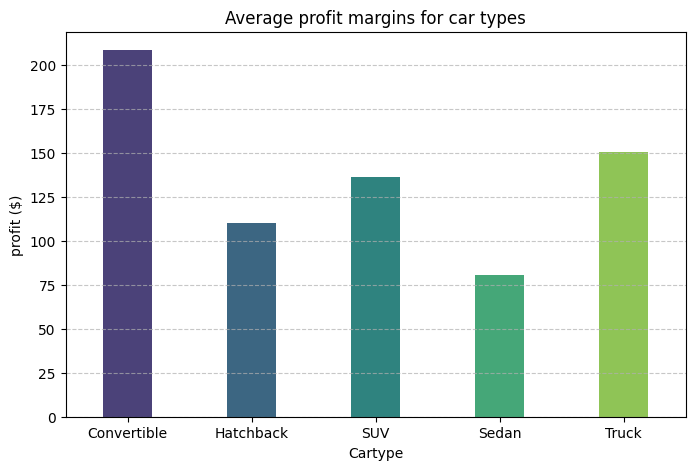

In [11]:
#3. average profit margin for car types
df_sold=data[data['SoldPrice']>0]
df_sold["Profit"]=df_sold['SoldPrice']-df_sold['PurchasedPrice']
avg_profit_per_type=df_sold.groupby("CarType")["Profit"].mean()
print(avg_profit_per_type)

#plot
avg_profit=df_sold.groupby("CarType",as_index=False)["Profit"].mean()
plt.figure(figsize=(8,5))
sns.barplot(data=avg_profit,x="CarType", y="Profit",palette="viridis",width=0.4)
plt.xlabel("Cartype")
plt.ylabel("profit ($)")
plt.title("Average profit margins for car types")
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.show()

##### 4. Percentage difference in purchase and sold price for each car model.

     CarName  PurchasedPrice    SoldPrice  PriceDifference  PercentageChange
0      Creta     5930.728261  5920.804348        -9.923913         -0.046484
1      Dzire     6314.915584  6441.668831       126.753247          2.048300
2     Etriga     5840.141176  6027.664706       187.523529          3.310647
3   Fortuner     7382.039106  7557.698324       175.659218          2.363505
4      Hilux     6859.227545  6985.185629       125.958084          1.825735
5       Kags     7319.458564  7442.718232       123.259669          1.641077
6      Plato     8441.425926  8649.716049       208.290123          2.722114
7    Scorpio     7401.414286  7533.492857       132.078571          1.959623
8     Seltos     5883.377483  6024.814570       141.437086          2.744269
9      Swift     6287.677852  6320.523490        32.845638          0.520161
10      Thar     7275.664596  7386.273292       110.608696          1.467837
11     Yodha     6739.778351  6911.319588       171.541237          2.546465

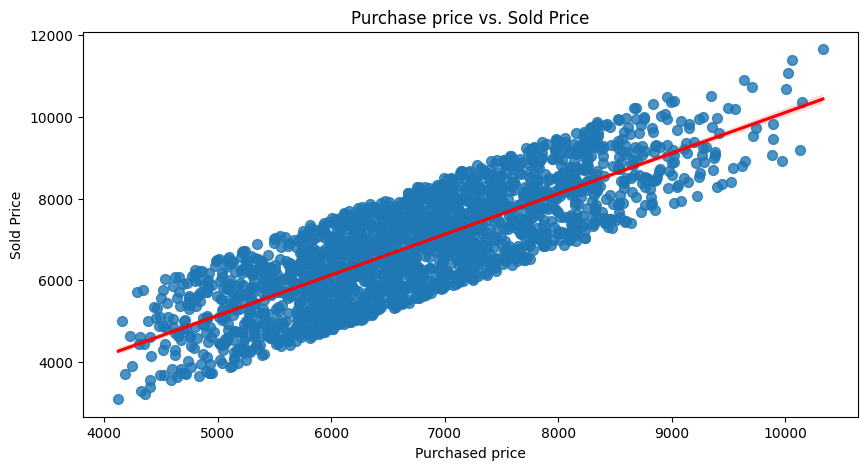

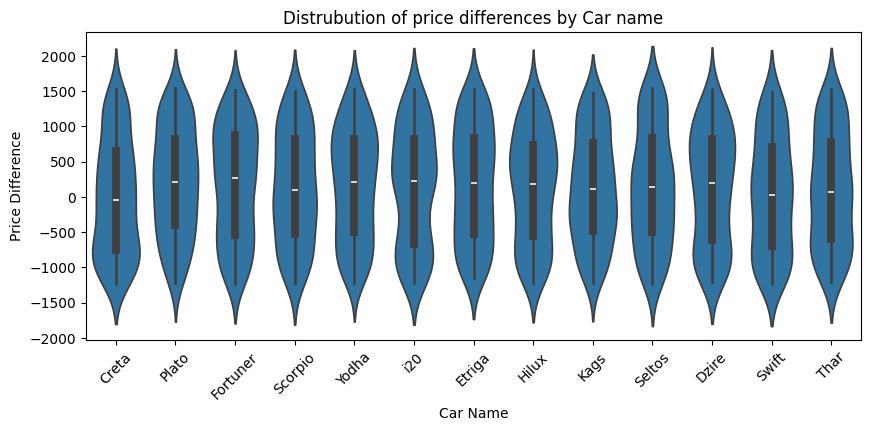

In [12]:
#4. How does the different between purchase price and sold price vary for different car model.Exclude sold price 0 as it is unsold one.
data=data[data['SoldPrice']>0]
data['PriceDifference']=data['SoldPrice']-data['PurchasedPrice']
data['PercentageChange']=((data['SoldPrice']-data['PurchasedPrice'])/data['PurchasedPrice'])*100
df_grouped=data.groupby('CarName').agg({'PurchasedPrice':'mean','SoldPrice':'mean','PriceDifference':'mean','PercentageChange':'mean'}).reset_index()
print(df_grouped)

#plot
plt.figure(figsize=(10,5))
sns.regplot(x=data['PurchasedPrice'],y=data['SoldPrice'],scatter_kws={'s':50},line_kws={"color":'red'})
plt.xlabel('Purchased price')
plt.ylabel('Sold Price')
plt.title('Purchase price vs. Sold Price')
plt.show()

#plot
plt.figure(figsize=(10,4))
sns.violinplot(x='CarName',y='PriceDifference',data=data)
plt.xticks(rotation=45)
plt.title("Distrubution of price differences by Car name")
plt.xlabel('Car Name')
plt.ylabel('Price Difference')
plt.show()

##### 5. Correlation between Feedback and MileageKM

In [13]:
#5.correlation between feedback and Mileage
feedback_mapping={'Excellent':4,'Good':3,'Average':2,'Poor':1}
data['FeedbackScore']=data['Feedback'].map(feedback_mapping)
print(data[['Feedback','FeedbackScore','MileageKM']])
correlation=data[['FeedbackScore','MileageKM']].corr()
print('Correlation between feedback and Mileage:\n',correlation)
#no relation


       Feedback  FeedbackScore  MileageKM
1          Good              3      34637
3       Average              2      46250
5     Excellent              4      38716
14    Excellent              4      95835
17         Good              3      66534
...         ...            ...        ...
9961  Excellent              4      37448
9981  Excellent              4      60579
9983  Excellent              4      68001
9993       Good              3      96006
9995  Excellent              4      55333

[2166 rows x 3 columns]
Correlation between feedback and Mileage:
                FeedbackScore  MileageKM
FeedbackScore       1.000000   0.011245
MileageKM           0.011245   1.000000


##### 6. New and Old car selling time

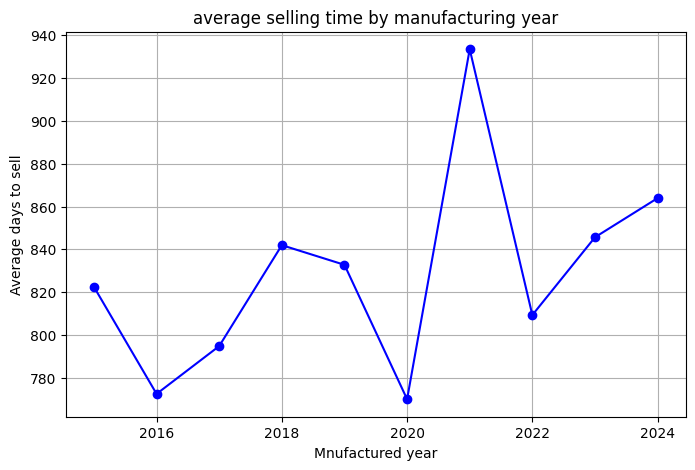

   ManufacturedYear  Days_to_sell
0              2015    822.490099
1              2016    772.530806
2              2017    794.855814
3              2018    841.975490
4              2019    832.795455
5              2020    770.047619
6              2021    933.450237
7              2022    809.345133
8              2023    845.655502
9              2024    863.930233


In [14]:
#6.are new cars(manufacturedYear) selling faster than old cars?
data['Days_to_sell']=(data['SoldDate']-data['PurchasedDate']).dt.days
average_selling_time=data.groupby('ManufacturedYear')['Days_to_sell'].mean().reset_index()
plt.figure(figsize=(8,5))
plt.plot(average_selling_time['ManufacturedYear'],average_selling_time['Days_to_sell'],marker='o',linestyle='-',color='blue')
plt.title("average selling time by manufacturing year")
plt.xlabel('Mnufactured year')
plt.ylabel('Average days to sell')
plt.grid(True)
plt.show()
print(average_selling_time)


##### 7. Most prefered energy Type by buyers

Energy
Electric    557
Petrol      552
Hybrid      529
Diesel      528
Name: count, dtype: int64


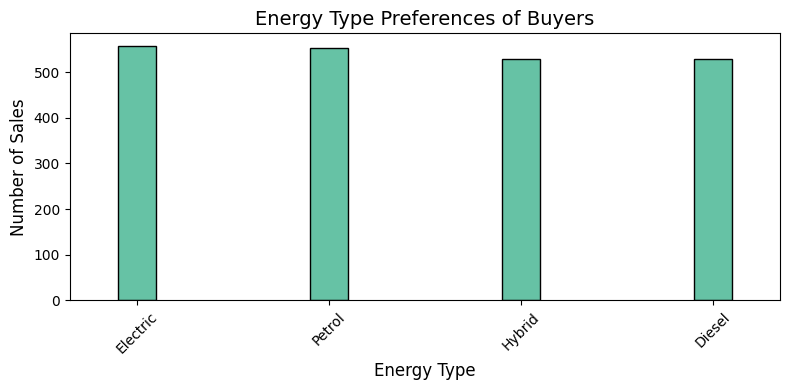

In [15]:
#7.which energy type is most prefered by buyers

sold_cars = data[data['CarSaleStatus'] == 'Sold']
# Count the occurrences of each energy type in the sold cars
energy_preference = sold_cars['Energy'].value_counts()
print(energy_preference)


#Plot
energy_preference = sold_cars['Energy'].value_counts()
plt.figure(figsize=(8, 4))
energy_preference.plot(kind='bar', cmap='Set2', edgecolor='black',width=0.2)
plt.title('Energy Type Preferences of Buyers', fontsize=14)
plt.xlabel('Energy Type', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 8. Peak month for car Sale

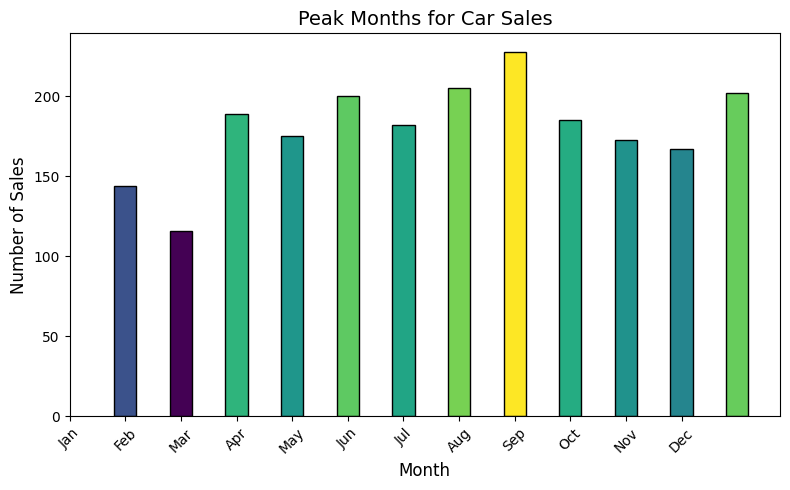

In [16]:
#8.Peak month for car sale based on sold Date
sold_cars = data[data['CarSaleStatus'] == 'Sold']
sold_cars['SoldMonth'] = sold_cars['SoldDate'].dt.month
sales_per_month = sold_cars['SoldMonth'].value_counts().sort_index()
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=sales_per_month.min(), vmax=sales_per_month.max())
colors = [cmap(norm(val)) for val in sales_per_month]
plt.figure(figsize=(8, 5))
bars = plt.bar(sales_per_month.index, sales_per_month.values, color=colors, edgecolor='black',width=0.4)
plt.title('Peak Months for Car Sales', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

##### 9. Distributor with most expensive average sales

DistributorName
Olx    7200.530435
Name: SoldPrice, dtype: float64


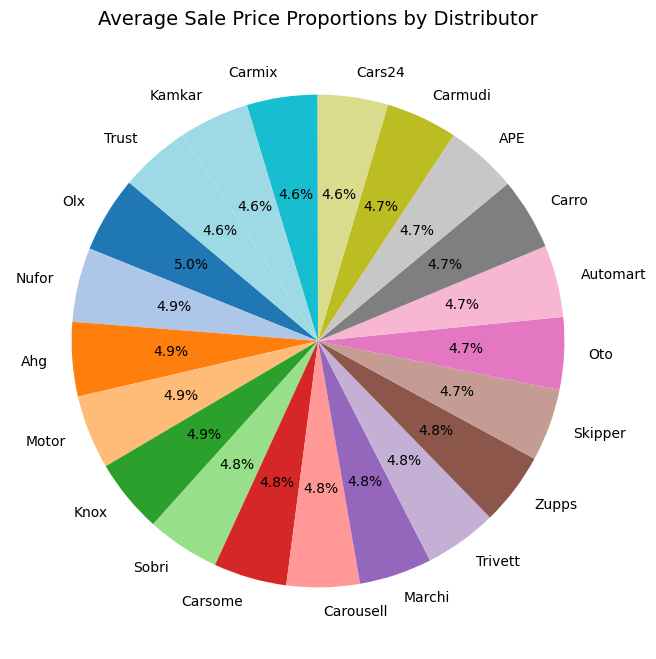

In [17]:
#9 Distributor with most expensive average sales.
sold_cars = data[data['CarSaleStatus'] == 'Sold']
average_sales_per_distributor = sold_cars.groupby('DistributorName')['SoldPrice'].mean()
most_expensive_distributor = average_sales_per_distributor.sort_values(ascending=False).head(1)
print(most_expensive_distributor)

#plot
sorted_average_sales = average_sales_per_distributor.sort_values(ascending=False)
plt.figure(figsize=(8, 8))
colors = plt.cm.tab20(range(len(sorted_average_sales)))
plt.pie(sorted_average_sales, labels=sorted_average_sales.index, autopct='%1.1f%%', 
        startangle=140, colors=colors)
plt.title('Average Sale Price Proportions by Distributor', fontsize=14)
plt.show()


##### 10. Which manufacturer has the highest sales volume

ManufacturerName
Maruti    473
dtype: int64


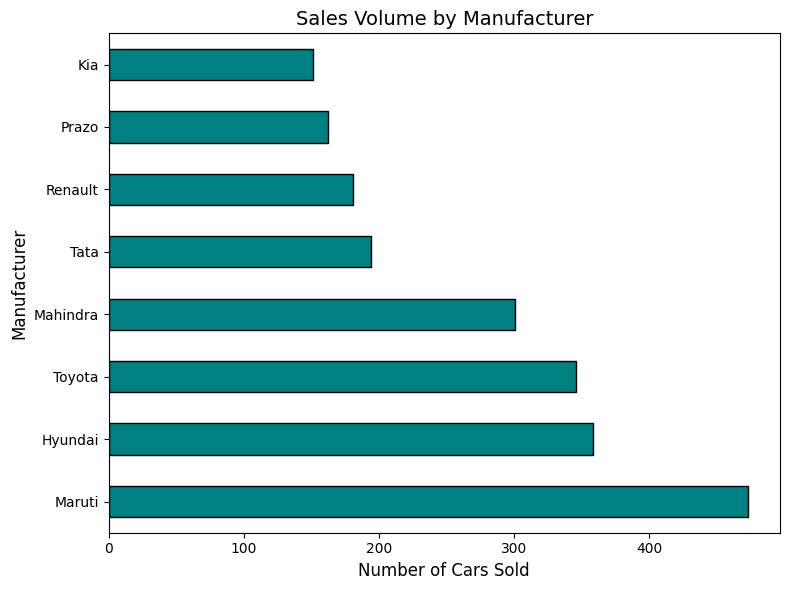

In [18]:
#10 which manufacturer has the highest sales volume.
sold_cars = data[data['CarSaleStatus'] == 'Sold']
sales_volume_per_manufacturer = sold_cars.groupby('ManufacturerName').size()
highest_sales_manufacturer = sales_volume_per_manufacturer.sort_values(ascending=False).head(1)
print(highest_sales_manufacturer)

#plot
sorted_sales_volume = sales_volume_per_manufacturer.sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sorted_sales_volume.plot(kind='barh', color='teal', edgecolor='black')
plt.title('Sales Volume by Manufacturer', fontsize=14)
plt.xlabel('Number of Cars Sold', fontsize=12)
plt.ylabel('Manufacturer', fontsize=12)
plt.tight_layout()
plt.show()

##### 11. Correlation Matrix and Heatmap

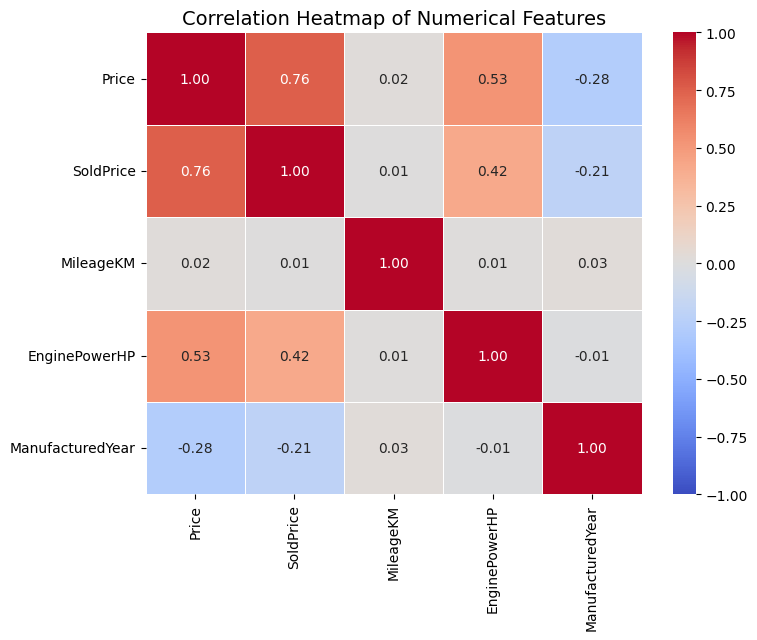

In [19]:
#11.Find correlation matrix and plot heatmap
data['SoldPrice'] = np.where((data['CarSaleStatus'] == 'Unsold'), np.nan, data['SoldPrice'])
numerical_columns = ['Price', 'SoldPrice', 'MileageKM', 'EnginePowerHP', 'ManufacturedYear']
df_filtered = data[numerical_columns].dropna()
correlation_matrix = df_filtered.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

##### 12. Mileage Range and average Time to Sell

MileageRange
0-50K       800.699029
50K-100K    867.280645
100K+              NaN
Name: TimeToSell, dtype: float64


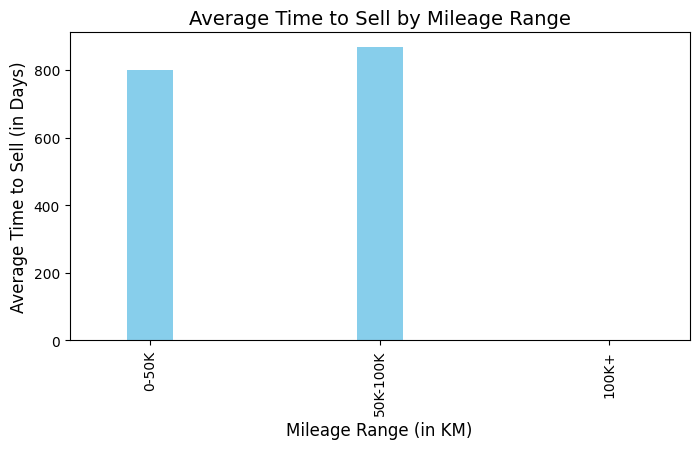

In [20]:
#12 Milage range and avg time to sell
data['TimeToSell'] = (data['SoldDate'] - data['PurchasedDate']).dt.days
bins = [0, 50000, 100000, float('inf')]  # 0-50K, 50K-100K, 100K+
labels = ['0-50K', '50K-100K', '100K+']
data['MileageRange'] = pd.cut(data['MileageKM'], bins=bins, labels=labels)
AverageTimeToSell = data.groupby('MileageRange')['TimeToSell'].mean()
print(AverageTimeToSell)

#plot
data=data.dropna()
avg_time_to_sell = data.groupby('MileageRange')['TimeToSell'].mean()
plt.figure(figsize=(8, 4))
avg_time_to_sell.plot(kind='bar', color='skyblue',width=0.2)
plt.xlabel('Mileage Range (in KM)', fontsize=12)
plt.ylabel('Average Time to Sell (in Days)', fontsize=12)
plt.title('Average Time to Sell by Mileage Range', fontsize=14)
plt.show()

##### 13. Price and Engine power relation

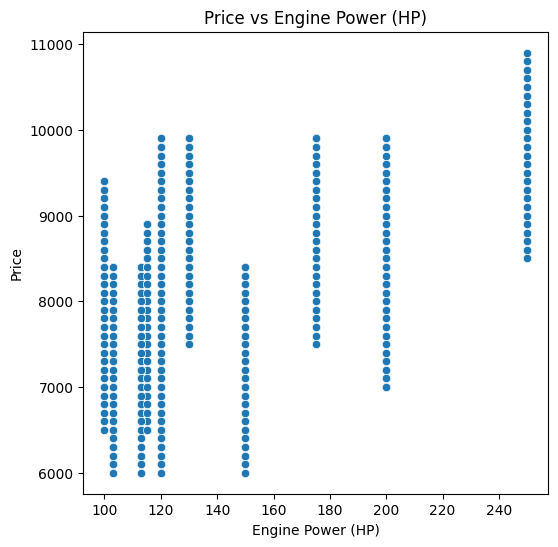

Correlation between Price and Engine Power (HP): 0.5277651954455963


In [21]:
#13 Relationship between price and engine powerHP.
plt.figure(figsize=(6, 6))
sns.scatterplot(data=data, x='EnginePowerHP', y='Price')
plt.title('Price vs Engine Power (HP)')
plt.xlabel('Engine Power (HP)')
plt.ylabel('Price')
plt.show()

# correlation
correlation = data[['Price', 'EnginePowerHP']].corr().iloc[0, 1]
print(f'Correlation between Price and Engine Power (HP): {correlation}')
# moderate positive correlation.

##### 14. Sales Rating for Each sales Agent

[5 1 2 3 4]


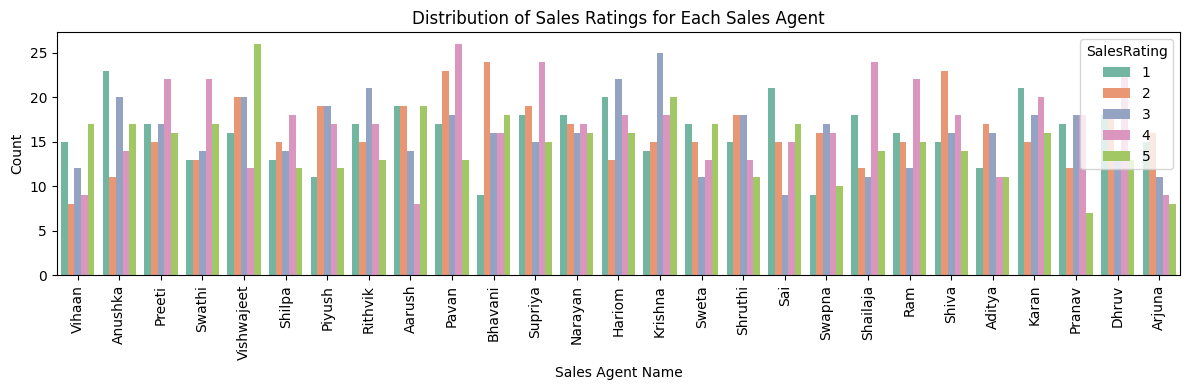

In [22]:
#14. Sales rating for each salesagent.

print(data['SalesRating'].unique())

plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='SalesAgentName', hue='SalesRating', palette='Set2')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Sales Ratings for Each Sales Agent')
plt.xlabel('Sales Agent Name')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

##### 15. Sales across different location

          Location    SoldPrice
12        San Jose  7131.634921
2         Columbus  7076.112903
13       Tennessee  7030.067114
4          Detroit  6964.252252
14           Texas  6926.406250
1          Chicago  6895.000000
16            Utah  6877.387931
3           Denver  6858.314050
5          Florida  6844.159292
8   North Carolina  6839.189873
15          Tucson  6805.985915
0       California  6787.661017
11        Portland  6786.311111
10    Philadelphia  6758.193548
6          Madison  6721.783784
7         New York  6710.107438
9         Oklahoma  6705.347826


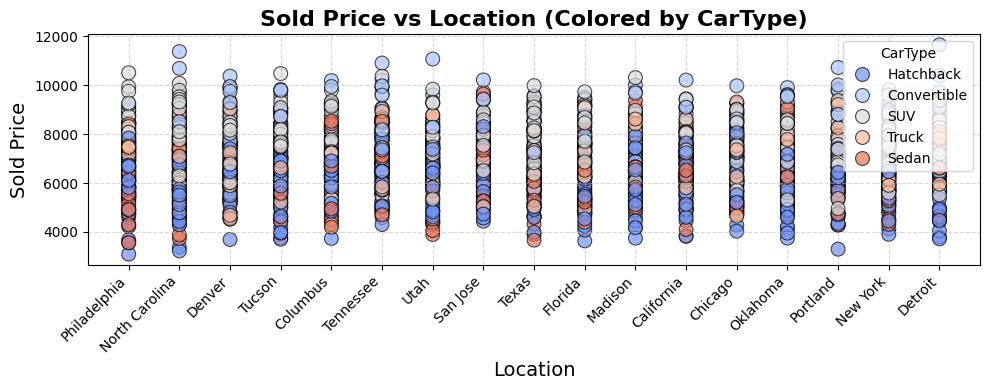

In [23]:
#15.how do sales vary across different location
sales_by_location = data.groupby('Location')['SoldPrice'].mean().reset_index()
sales_by_location = sales_by_location.sort_values(by='SoldPrice', ascending=False)
print(sales_by_location)

# Plotting Average Sold Price by Location
plt.figure(figsize=(10, 4))
sns.scatterplot(
    data=data,
    x='Location',  # x-axis: Location
    y='SoldPrice',  # y-axis: SoldPrice
    hue='CarType',  # Color the points by CarType
    palette='coolwarm',  # Choose a color palette (you can use any palette you like)
    s=100,  # Size of the points
    edgecolor='black',  # Add black edges to the points for clarity
    alpha=0.7  # Transparency for the points
)
plt.title('Sold Price vs Location (Colored by CarType)', fontsize=16, weight='bold')
plt.xlabel('Location', fontsize=14)
plt.ylabel('Sold Price', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 16. Manufacturer and Car Type sales count

Manufacturer and CarType sales count:
  ManufacturerName      CarType  CarCount
0          Hyundai    Hatchback       358
1              Kia    Hatchback       151
2         Mahindra          SUV       301
3           Maruti    Hatchback       170
4           Maruti        Sedan       303
5            Prazo  Convertible       162
6          Renault          SUV       181
7             Tata        Truck       194
8           Toyota          SUV       179
9           Toyota        Truck       167

Total count of each CarType:
       CarType  CarCount
0    Hatchback       679
1          SUV       661
2        Truck       361
3        Sedan       303
4  Convertible       162


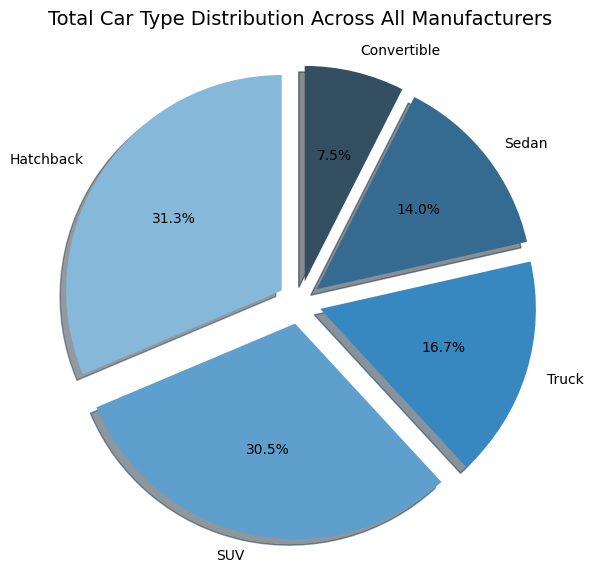

In [24]:
#16. Manufacturer and car type sales count.
manufacturer_cartype_count = data.groupby(['ManufacturerName', 'CarType']).size().reset_index(name='CarCount')
# Count of each CarType
car_type_count = data['CarType'].value_counts().reset_index(name='CarCount')
car_type_count.columns = ['CarType', 'CarCount']
print("Manufacturer and CarType sales count:")
print(manufacturer_cartype_count)
print("\nTotal count of each CarType:")
print(car_type_count)

#plot
plt.figure(figsize=(7, 7))
plt.pie(
    car_type_count['CarCount'],  # Total count of each CarType across all manufacturers
    labels=car_type_count['CarType'],  # Labels are CarType
    autopct='%1.1f%%',  # Show percentage
    startangle=90,  # Start angle for better visualization
    colors=sns.color_palette("Blues_d", len(car_type_count)),  # Color palette for CarTypes
    explode=[0.1] * len(car_type_count),  # Explode the first slice (optional)
    shadow=True  # Add shadow for effect
)
plt.title('Total Car Type Distribution Across All Manufacturers', fontsize=14)
plt.show()

##### 17. Manufacturer, Distributor and Car With top sale

Manufacturer with the most sales: Maruti with sales of 2958478.0
Distributor with the most sales: Olx with sales of 828061.0
Car with the most sales: Plato with sales of 1401254.0


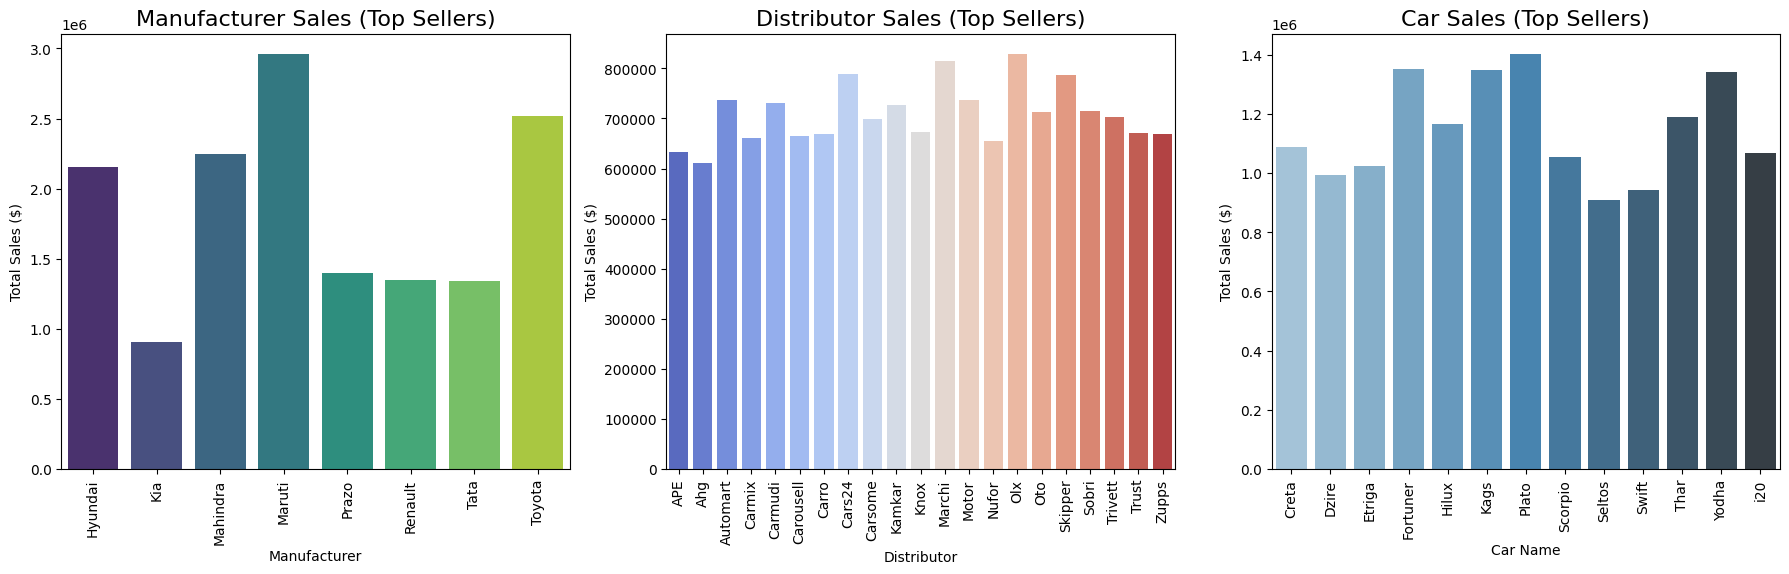

In [25]:
#17 manufacturer,distributor and car with most sale.
sold_df = data[data['CarSaleStatus'] == 'Sold']
manufacturer_sales = sold_df.groupby('ManufacturerName')['SoldPrice'].sum().reset_index()
max_manufacturer_sales = manufacturer_sales.loc[manufacturer_sales['SoldPrice'].idxmax()]
distributor_sales = sold_df.groupby('DistributorName')['SoldPrice'].sum().reset_index()
max_distributor_sales = distributor_sales.loc[distributor_sales['SoldPrice'].idxmax()]
car_sales = sold_df.groupby('CarName')['SoldPrice'].sum().reset_index()
max_car_sales = car_sales.loc[car_sales['SoldPrice'].idxmax()]
print(f"Manufacturer with the most sales: {max_manufacturer_sales['ManufacturerName']} with sales of {max_manufacturer_sales['SoldPrice']}")
print(f"Distributor with the most sales: {max_distributor_sales['DistributorName']} with sales of {max_distributor_sales['SoldPrice']}")
print(f"Car with the most sales: {max_car_sales['CarName']} with sales of {max_car_sales['SoldPrice']}")

#plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Plotting Manufacturer Sales in the first subplot
sns.barplot(data=manufacturer_sales, x='ManufacturerName', y='SoldPrice', palette='viridis', ax=axes[0])
axes[0].set_title('Manufacturer Sales (Top Sellers)', fontsize=16)
axes[0].set_xlabel('Manufacturer')
axes[0].set_ylabel('Total Sales ($)')
axes[0].tick_params(axis='x', rotation=90)
# Plotting Distributor Sales in the second subplot
sns.barplot(data=distributor_sales, x='DistributorName', y='SoldPrice', palette='coolwarm', ax=axes[1])
axes[1].set_title('Distributor Sales (Top Sellers)', fontsize=16)
axes[1].set_xlabel('Distributor')
axes[1].set_ylabel('Total Sales ($)')
axes[1].tick_params(axis='x', rotation=90)
# Plotting Car Sales in the third subplot
sns.barplot(data=car_sales, x='CarName', y='SoldPrice', palette='Blues_d', ax=axes[2])
axes[2].set_title('Car Sales (Top Sellers)', fontsize=16)
axes[2].set_xlabel('Car Name')
axes[2].set_ylabel('Total Sales ($)')
axes[2].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

## SUMMARY

This EDA project on used car sales data revealed several key findings. Maruthi emerged as the manufacturer with the highest sales volume, while Olx was the distributor with the most car sales. The car model with the most sales was the Plato, and the most popular car type was Hatchback. San Jose recorded the highest number of sales (7131), while Oklahoma had the fewest (6705). A scatter plot showed a moderate positive relationship between price and engine power. Additionally, it was found that as mileage increases, the time taken to sell a car also increases. September was identified as the peak month for car sales, with March seeing the least sales activity. Electric vehicles had the highest demand, while diesel vehicles had the lowest. Cars from the 2021 model year took the longest to sell, while 2016 models sold the fastest. In terms of profit margin, convertibles had the highest average margin at 208, whereas trucks had the lowest at 150.

###   Suggestions :

1. Focus on increasing the availability of Hatchbacks, as they have the highest sales count.
2. Strengthen marketing efforts in locations like Oklahoma to boost sales where demand is lower.
3. Prioritize electric vehicles in inventory, as they are in the highest demand.
4. Consider introducing incentives or promotions in March to increase sales during the slow month.
5. Stock more 2016 model cars, as they sell faster compared to 2021 models.
6. Offer special deals on convertibles to capitalize on their higher profit margins.
7. Explore partnerships with distributors like Olx to further increase sales volume.
8. Investigate factors that cause longer selling times for high-mileage cars and find ways to reduce these delays.
9. Optimize pricing strategies based on the positive correlation between price and engine power.
10. Analyze the reasons behind the longer selling times of newer models and adjust inventory accordingly.